# TP : Location de vélos en libre-service

L’organisme de gestion d’un système de location de vélos en libre-service (ex: Vélib) cherche à organiser ses équipes de maintenance pour répondre au mieux à la demande de ses clients.
<br> <br> **Votre mission :** <br>
Réaliser un modèle permettant de prédire le nombre de vélos loués par heure

**Objectifs de ce TP :** <br>
* Dérouler la méthodologie du « POC » sur une problématique donnée
* Utiliser les grandes familles d’algorithmes présentées en cours
* Mettre en place les pratiques adaptées pour l’entraînement d’un modèle

**Format du rendu :** <br>
* Le code fourni doit être écrit en Python et en format Jupyter Notebook. ​
* Votre notebook doit contenir du code, du texte et des graphiques. Vous devez envoyer l’export HTML de votre notebook avec toutes les cellules exécutées. Assurez-vous que le fichier produit est lisible.​
* Vous pouvez utiliser n’importe quelle libraire Python que vous jugez nécessaire.​
* Il ne s’agit pas d’une competition de type Kaggle : vous ne serez pas uniquement évalué sur la performance du modèle mais plutôt sur la pertinence et la justification de vos choix ainsi que sur la qualité de vos explications.


Voici un descriptif de l'ensemble des variables :
* *instant* - index du relevé
* *dteday* - date du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *mnth* - mois du relevé (entre 1 et 12)
* *hr* - heure du relevé (entre 0 et 23)
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *weekday* - day of the week
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

## Questions préalables

**1) Quelle famille d’algorithmes semble adaptée à la mission qui vous a été confiée ?**

Pour prédire le nombre de vélos loués par heure à partir des données fournies, l'utilisation d'algorithmes de machine learning dédiés à la régression est requise, car la variable cible (le nombre de vélos loués par heure) est continue. Voici quelques familles d'algorithmes adaptées à cette tâche :
**Régression linéaire et ses variantes** : Un bon point de départ pour les problèmes de régression. Les variantes comme la régression Ridge ou Lasso peuvent être envisagées pour gérer la régularisation et éviter le surajustement.

**Arbres de décision et forêts aléatoires** : car les arbres de décision sont efficaces pour capturer des relations non linéaires et des interactions entre les variables. Les forêts aléatoires, qui sont un ensemble d'arbres de décision, peuvent améliorer la performance et la robustesse du modèle.

**Réseaux de neurones** : Bien que plus complexes à mettre en œuvre et nécessitant plus de données pour un entraînement efficace, les réseaux de neurones peuvent être très performants, en particulier pour capturer des relations non linéaires et des interactions complexes.

**Support Vector Machines (SVM)** : Vue que nous somme dans un cas de regression, les SVM avec un noyau adapté peuvent également être utilisés pour des problèmes de régression (SVR), en particulier lorsque la relation entre les variables indépendantes et la variable cible est complexe.

**Gradient Boosting Machines (GBM)** : Nous vons également des algorithmes tels que XGBoost, LightGBM, ou CatBoost peuvent fournir d'excellents résultats sur des problèmes de régression. Ils sont performants pour gérer différents types de données et capturer des relations complexes.

**2) Quelles variables sont susceptibles de constituer une « cible » ?**

la variable cible est cmt, mais les variables causal et registered peuvent égalment constituer la notre variable cible, car la somme de ces deux variables forme la variable cnt. . L'analyse de ces deux variables séparément peut fournir des informations précieuses sur les différents types d'utilisateurs du service de location de vélos et comment leurs comportements varient en fonction des variables explicatives comme la météo, l'heure, le jour de la semaine, etc

## Imports

Vous ajouterez les éventuels imports supplémentaires nécessaires à la cellule ci-dessous :

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Extraction et prise en main de la donnée

Dans cette partie, on va commencer par lire les données et vérifier leur intégrité. C'est également le moment de s'assurer qu'on comprend bien l'ensemble des champs que l'on a à disposition. 

In [76]:
df = pd.read_csv("Data/velo.csv")
df.head()

,instant,dteday,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,1,0,0,6,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,1,1,0,6,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,1,2,0,6,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,1,3,0,6,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,1,4,0,6,1,9.84,14.395,75.0,0.0,0,1,1


In [3]:
df.dtypes

instant         int64
dteday         object
season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
df.describe()

,instant,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,15715.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,6.537775,11.546752,0.028770,3.003683,1.425283,20.376474,23.788755,62.774038,12.736540,35.676218,153.786869,189.463088
std,5017.0295,1.106918,3.438776,6.914405,0.167165,2.005771,0.639357,7.894801,8.592511,19.321135,8.196795,49.305030,151.357286,181.387599
min,1.0000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,4.000000,6.000000,0.000000,1.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,10.000000,18.000000,0.000000,5.000000,2.000000,27.060000,31.060000,78.500000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,4.000000,12.000000,23.000000,1.000000,6.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


**3) A partir de ces analyses ainsi que d'analyses additionnelles dont le code sera exécuté ci-dessous, quelles remarques pouvez-vous faire sur la qualité de données ? Le descriptif des variables vous paraît-il complet et exact ?**

on remarque **des variable cartégorielle** : saison, mnth, hr holiday, weekday, weathersit,  car ces variables sont souvent enregistrées sous forme numérique dans les ensembles de données, mais leurs valeurs représentent différentes catégories ou classes. Par exemple, 'season' avec des valeurs de 1 à 4 représente probablement quatre saisons différentes.

**Variables continues** (Temp, atemp, humidity, windspeed):Ces variables mesurent des quantités continues (comme la température ou la vitesse du vent) et sont donc mieux décrites par des mesures telles que la moyenne et l'écart-type.

**Grande ou petite variabilité de cnt** : La variabilité est souvent évaluée en comparant l'écart-type à la moyenne. Un écart-type élevé par rapport à la moyenne suggère une grande variabilité. Dans le cas de notre variable cible 'cnt, un écart-type de 181.39 par rapport à une moyenne de 189.46 est relativement élevé, indiquant une grande variabilité dans le nombre de vélos loués.

**valeures manquante** : le compte de la variable hum permet d'identifier qu'il y a des valeures manquante.

## Préparation

**4) Quelles sont les variables catégorielles ? Les variables numériques ? En complétant le code ci-dessous, vous vous assurerez du bon typage de la donnée à traiter.**

In [77]:
cat_vars = ["mnth","hr","season","holiday","weekday","weathersit"]

In [78]:
#transformation en variable cartegorielles
for c in cat_vars:
    df[c] = df[c].astype('category')

## Exploration

**5) Que pouvez-vous analyser à partir des graphiques ci-dessous ?**

<Axes: xlabel='weekday', ylabel='cnt'>

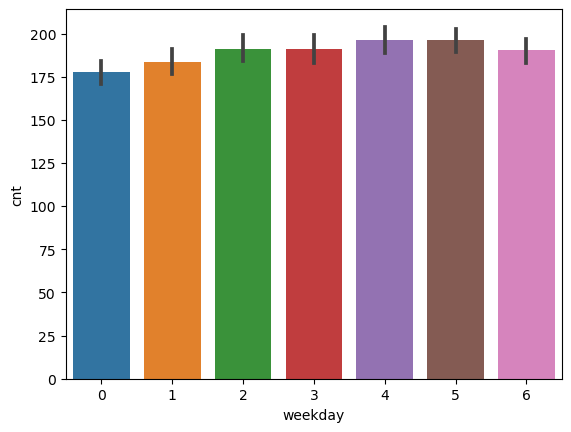

In [59]:
sns.barplot(x = "weekday", y="cnt", data=df, estimator=np.mean)

Le graphique présenté est un diagramme à barres qui illustre la moyenne du nombre total de vélos loués ('cnt') pour chaque jour de la semaine ('weekday'). L'axe des x représente les jours de la semaine, probablement codés de 0 à 6, tandis que l'axe des y représente le nombre moyen de locations de vélos.

D'après le graphique, il est observable que la location de vélos ne varie pas de manière significative en fonction des jours de la semaine, avec une légère augmentation pour les jours correspondant aux codes 4 et .

Les barres pour les jours 4 et 5 sont légèrement plus hautes que les autres, ce qui suggère que ces jours pourraient être associés à un trafic plus élevé de location de vélos. Les jours 2, 3, et 6 suivent de près en termes de moyenne de locations, tandis que le jour 0 a la moyenne la plus basse de locations de véos.

Les barres d'erreur verticales indiquent l'intervalle de confiance pour la moyenne estimée, ce qui donne une idée de la variabilité et de la fiabilité des moyennes. Le fait que ces barres d'erreur semblent être de taille similaire pour chaque jour indique que la variabilité du nombre de locations est à peu près constante tout au long de la semaine.

Cette tendance pourrait refléter des habitudes typiques, comme une utilisation accrue des vélos pour les déplacements en milieu de semaine et une diminution à partir des jours non ouvrables ou le week-end

<Axes: xlabel='weekday', ylabel='cnt'>

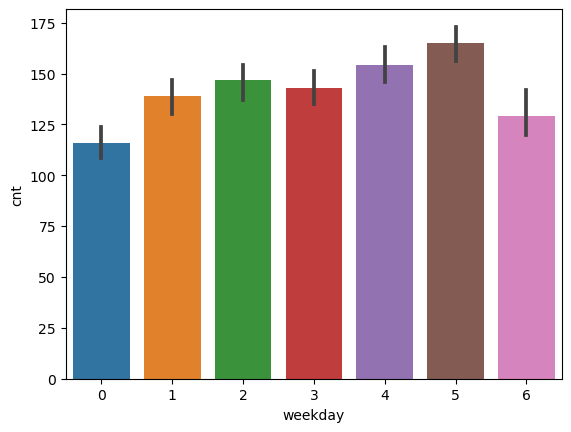

In [33]:
sns.barplot(x = "weekday", y="cnt", data=df, estimator=np.median)

la barre de médiane affichichée après la barre des moyennes a une allure différente de celle de la moyenne. L'intérêt d'afficher  la médianne est que la médiane est moins sensible aux valeurs aberrantes et aux données extrêmes que la moyenne. Si le nombre de locations a des jours avec des valeurs extrêmement élevées ou basses (peut-être en raison d'événements spéciaux, de conditions météorologiques extrêmes, etc.), la médiane fournira une meilleure représentation de la tendance centrale typique sans être faussée par ces valeurs extrêmes
la médiane donne ainsi une meilleure idée du "centre" des données que la moyenne.

Le jour 0 (lundi) affiche la médiane la plus basse, suggérant que c'est le jour où le moins de vélos sont loués dans la semaine. Il y a une légère augmentation de la médiane des locations de vélos du lundi au mardi (jour 1), et une progression continue jusqu'au mercredi (jour 2).
Le jour 3 (jeudi) montre une légère diminution par rapport au jour 2 (mercredi), ce qui indique un léger recul de la demande de location.
La médiane augmente à nouveau le jour 4 (vendredi) et atteint un pic le jour 5 (samedi), ce qui pourrait être interprété comme une préférence pour les activités de loisir ou les déplacements du week-end.
Le jour 6 (dimanche) présente une médiane légèrement plus basse que le samedi, indiquant une petite baisse de la demande de location de vélos par rapport au pic du samedi.
Ces observations pourraient indiquer des tendances de comportement où la location de vélos est influencée par les routines hebdomadaires, avec une demande accrue pour les loisirs pendant le week-end, en particulier le samedi.

<Axes: xlabel='hr', ylabel='cnt'>

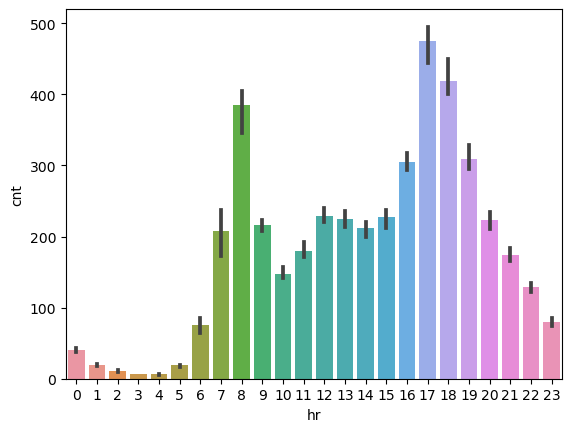

In [9]:
sns.barplot(x = "hr", y="cnt", data=df, estimator=np.median)

D'après le graphique, qui montre la médiane du nombre total de vélos loués ('cnt') par heure de la journée ('hr'), on peut observer les tendances suivantes :

**Heures creuses** : Dans les premières heures de la journée (de 0h à 6h), il y a une très faible médiane de locations de vélos, ce qui indique une faible activité de location pendant les heures de nuit et tôt le matin.

**Augmentation matinale** : Il y a une augmentation notable de la médiane autour de 7h et 8h, ce qui pourrait correspondre aux déplacements matinaux pour se rendre au travail ou à l'école.

**Heures de bureau** : Pendant les heures de travail habituelles (de 9h à 16h), la médiane se stabilise à un niveau légèrement plus élevé, suggérant une demande constante mais modérée de locations de vélos.

**Pics de soirée** : Une augmentation marquée de la médiane est observée de 17h à 18h, avec le pic le plus élevé autour de 17h. Cela est probablement dû aux déplacements de retour à la maison après le travail ou l'école.

**Déclin en soirée** : Après le pic de la soirée, il y a une diminution progressive de la médiane de location de vélos, bien que les heures jusqu'à 22h montrent encore une activité de location significative, probablement en raison des sorties en soirée ou d'autres activités nocturnes.


Les barres d'erreur sur le graphique indiquent la variabilité autour de la médiane pour chaque heure. La grande taille des barres d'erreur pendant les heures de pointe suggère une plus grande variabilité des locations pendant ces périodes, ce qui peut être dû à des jours spécifiques de la semaine ou à des conditions météorologiques changeantes influençant les habitudes de location. location.

<Axes: xlabel='hr', ylabel='casual'>

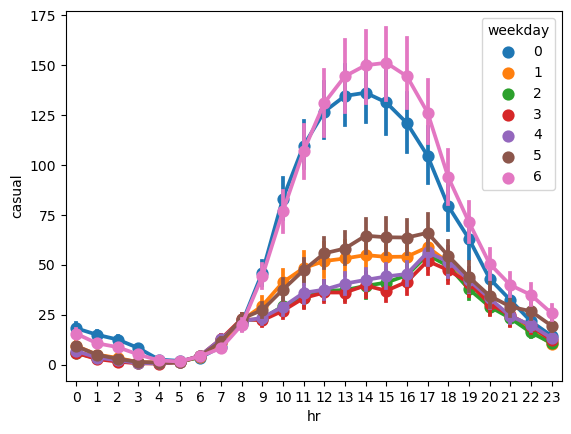

In [15]:
sns.pointplot(data=df, x='hr', y='casual', hue='weekday')

<Axes: xlabel='hr', ylabel='registered'>

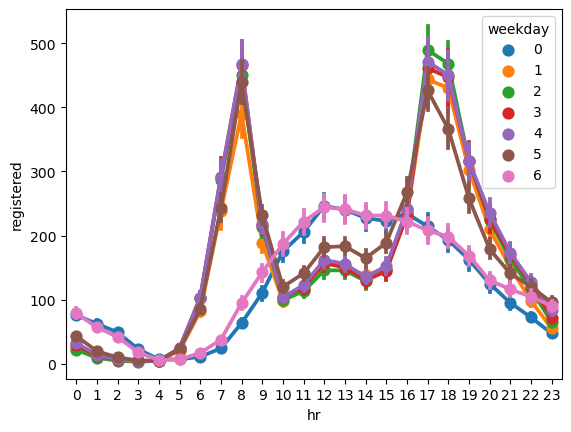

In [11]:
sns.pointplot(data=df, x='hr', y='registered', hue='weekday')

## Illustration des graphique ci-dessus


Les deux graphiques présentés illustrent les tendances des locations de vélos pour les usagers occasionnels ('casual') et les usagers abonnés ('registered') tout au long de la journée, réparties par jour de la semaine

**Pour les usagers occasionnels ('casual') :**
La première image montre que les locations 'casual' atteignent leur pic en milieu de journée, en particulier pendant les heures de l'après-midi.
Les pics les plus élevés pour les usagers occasionnels se produisent pendant les week-ends (jours 5 et 6, samedi et dimanche), ce qui suggère une augmentation des locations de vélos pour les loisirs ou les activités non liées au travail.
Les jours de semaine (du lundi au vendredi, jours 0 à 4) montrent une demande plus faible et des pics moins pronon

**Pour les usagers abonnés ('registered') :**

La deuxième image révèle deux pics distincts pendant les heures de pointe du matin et du soir pendant les jours de semaine, ce qui indique un modèle de déplacement pendulaire pour le travail ou l'éducation.
Les pics du matin sont particulièrement prononcés, suggérant une forte utilisation des vélos pour les déplacements vers le travail ou l'école.
Durant les week-ends, la demande de vélos loués par les usagers abonnés est plus uniformément répartie tout au long de la journée avec des pics moins marqués, ce qui pourrait refléter un modèle de déplacement plus détendu et diversi

**Analyse générale** :

Les usagers occasionnels ('casual') ont tendance à utiliser les vélos plus fréquemment pour les loisirs pendant les après-midis et surtout pendant les week-ends.
Les usagers abonnés ('registered') utilisent les vélos principalement pour les déplacements réguliers avec des schémas clairs de pics pendant les heures de rush en semaine.
Les comportements de location diffèrent significativement entre les usagers occasionnels et les usagers abonnés, avec des pics correspondant à des motifs d'utilisation différents (loisirs vs déplacements réguliers).fié.cés..

In [17]:
df.head()

,instant,dteday,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,1,0,0,6,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,1,1,0,6,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,1,2,0,6,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,1,3,0,6,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,1,4,0,6,1,9.84,14.395,75.0,0.0,0,1,1


[Text(0, 0, '(0, 5]'),
 Text(1, 0, '(5, 10]'),
 Text(2, 0, '(10, 15]'),
 Text(3, 0, '(15, 20]'),
 Text(4, 0, '(20, 25]'),
 Text(5, 0, '(25, 30]'),
 Text(6, 0, '(30, 35]'),
 Text(7, 0, '(35, 40]')]

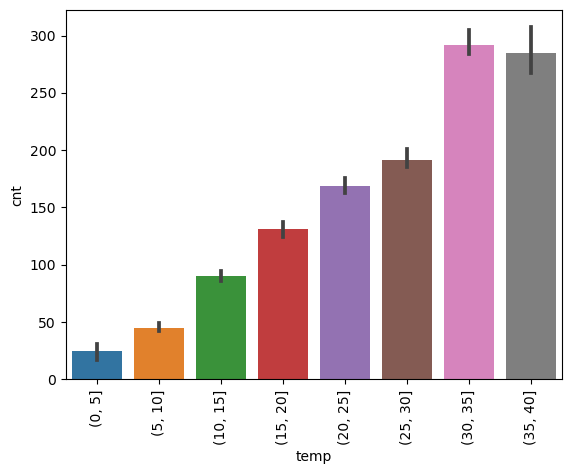

In [22]:
temp_range = range(0, round(df["temp"].max()), 5) 
temp_binned = pd.cut(df["temp"], bins=temp_range)
temp_plot = sns.barplot(x=temp_binned, y=df["cnt"], estimator=np.median)
temp_plot.set_xticklabels(temp_plot.get_xticklabels(), rotation=90)

Le diagramme ci-dessus montre la médiane du nombre de locations ('cnt') pour des plages de température spécifiques ('temp').On observe une tendance générale à l'augmentation de la médiane du nombre de locations à mesure que la température augmente. Les barres sont plus basses dans les plages de température plus froides (0-5, 5-10) et augmentent progressivement dans les plages de température plus chaudes (10-15, 15-20, et ainsi de suite).
Il y a un pic dans la plage de température la plus chaude (35-40), où la médiane du nombre de locations est la plus élevée. Cela peut suggérer que des températures plus chaudes sont favorables ou attrayantes pour la location de vélos.
Les barres d'erreur indiquées au-dessus de chaque barre fournissent un aperçu de la variabilité de la médiane. Plus la barre d'erreur est longue, plus la distribution des valeurs de 'cnt' autour de la médiane est large pour cette plage de température.

**6) Montrez des graphiques supplémentaires pertinents vous permettant de mieux comprendre les facteurs d'impact sur le nombre de vélos loués. Pour chacun de ces graphiques vous proposerez une analyse.**

### Diagramme à barres pour les locations par saison

<Axes: xlabel='season', ylabel='cnt'>

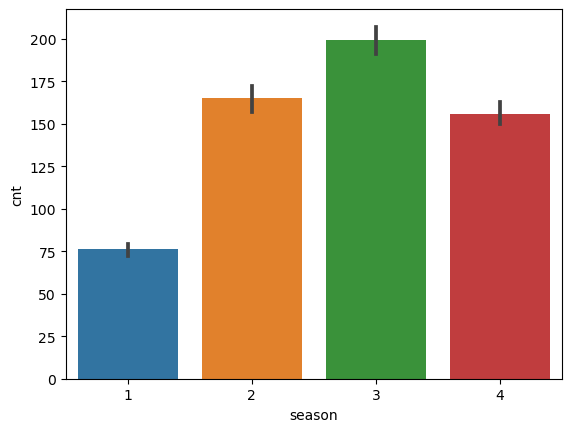

In [35]:
sns.barplot(x = "season", y="cnt", data=df, estimator=np.median)

on remarque qu'on a plus de demande en printemps, s'en suit l'été. on peu supposer donc qu'on a plus de demande dans les période où la temperature est peu éléver. il se peu que les utilisateurs préfère utilisé le velo lorsque les conditions sont ni trop froides ni trop chaudes.

## Distribution des locations par température ressentie

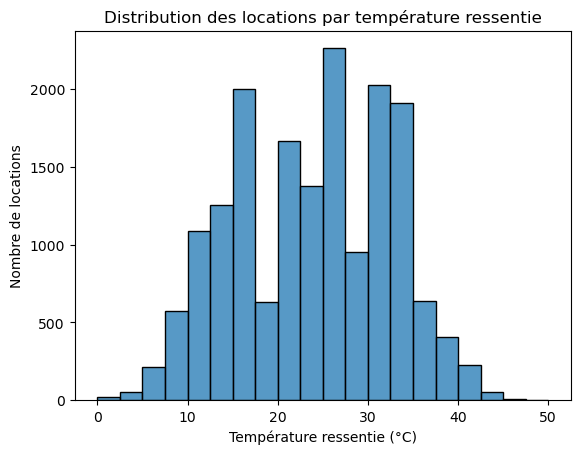

In [45]:
sns.histplot(df['atemp'], bins=20, kde=False)
plt.title('Distribution des locations par température ressentie')
plt.xlabel('Température ressentie (°C)')
plt.ylabel('Nombre de locations')
plt.show()

La distribution des locations par température ressentie présentée sur l'histogramme montre le nombre de locations de vélos en fonction de la température ressentie en degrés Celsius.

Analyse basée sur l'histogramme :

**Plage de température optimale :** Il y a une augmentation notable du nombre de locations dans la plage de température ressentie moyenne, entre environ 10°C et 30°C. Cela confirme que les utilisateurs préfèrent louer des vélos lorsque les conditions sont ni trop froides ni trop chaudes.

**Pic de location :** Le pic le plus élevé se trouve dans la plage de 20°C à 30°C, indiquant que c'est la plage de température la plus confortable pour la majorité des utilisateurs de vélos en libre-service.

**Chute dans les extrêmes :** Aux extrémités plus froides (0-10°C) et plus chaudes (30-50°C), le nombre de locations diminue, ce qui peut indiquer que les températures extrêmes sont moins propices à la location de vélos, probablement en raison d'un confort réduit et de considérations de sécurité.

**Températures froides :** À des températures ressenties proches de 0°C, le nombre de locations est le plus bas, ce qui est cohérent avec une baisse de l'activité extérieure due au froid.


L'histogramme montre que la température ressentie a un effet clair sur les décisions des utilisateurs de louer des vélos, avec des conditions modérées étant les plus favorables.  favorables. 

### Comparaison des jours de vacances avec les jours normaux

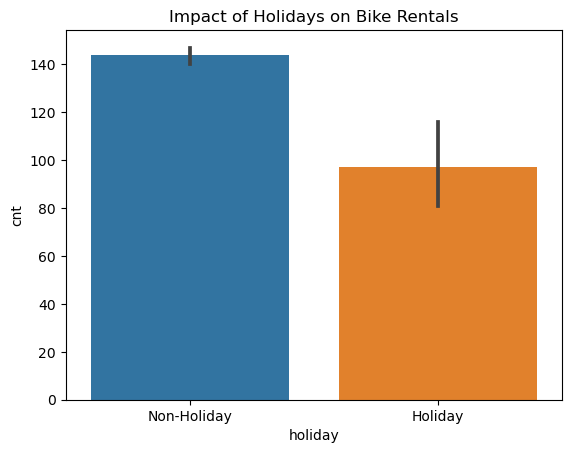

In [25]:
sns.barplot(x='holiday', y='cnt', data=df, estimator=np.median)
plt.title('Impact of Holidays on Bike Rentals')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

ce diagramme confirme nos suggestion concernant l'utilisation du vélo les jours ouvrables par rapport au jour férié et week-end.
En effet on a plus de locations de vélo les jours ouvrables

## Locations medianne par mois

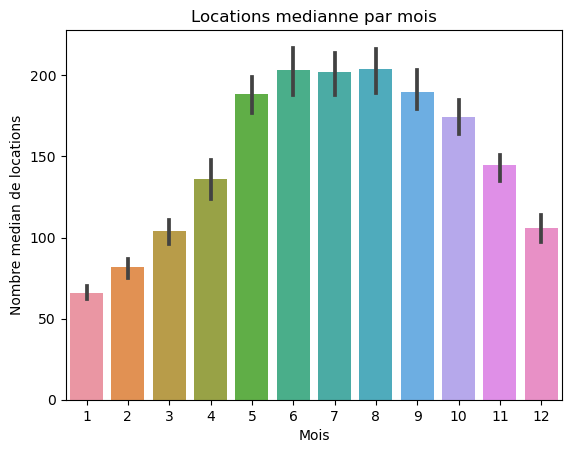

In [50]:
sns.barplot(data=df, x='mnth', y='cnt', estimator=np.median)
plt.title('Locations medianne par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre median de locations')
plt.show()


on remarque une evolution progressive jusqu'au mois de juin où la médianne de location de velo reste casi constante jusqu'au mois d'Août. ceci explique le fait que plus on tend vers les vacance plus l'utilisation du vélo est importante. ceci est du aux loisirs et événements des vacances. On remarque ensuite une décroisance progressive de la médianne de location de velo à partir du mois de septembre jusqu'a la fin de l'années. Cela s'explique par la reprise des activités c'est à dire école et travail

### Diagramme de dispersion avec tendance linéaire

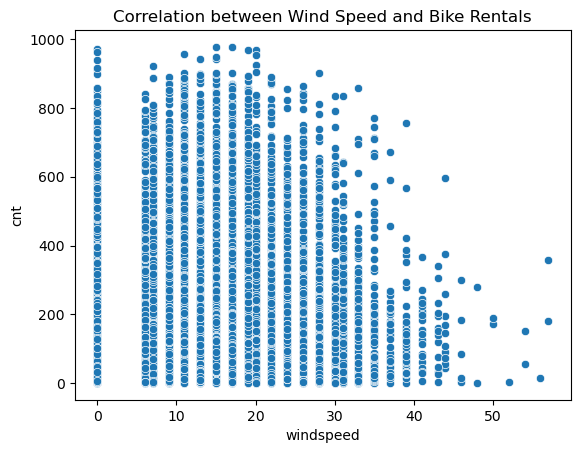

In [23]:
sns.scatterplot(x='windspeed', y='cnt', data=df)
plt.title('Correlation between Wind Speed and Bike Rentals')
plt.show()


on remarque que la que plus la vitesse du vent est grande moins il ya de location de vélo. cela serai dû au fait qu'il serait difficile voir risquer de rouler le velo pendant lors d'une tempête par exemple, mais également en periode d'hiver

## correlation entre variables

In [79]:
df['dteday'] = pd.to_datetime(df['dteday'])
correlation_matrix = df.corr()
print(correlation_matrix)

             instant    dteday    season      mnth        hr   holiday  \
instant     1.000000  0.999995  0.404046  0.489164 -0.004775  0.014723   
dteday      0.999995  1.000000  0.404452  0.489808 -0.006161  0.014737   
season      0.404046  0.404452  1.000000  0.830386 -0.006117 -0.009585   
mnth        0.489164  0.489808  0.830386  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006161 -0.006117 -0.005772  1.000000  0.000479   
holiday     0.014723  0.014737 -0.009585  0.018430  0.000479  1.000000   
weekday     0.001357  0.001372 -0.002335  0.010400 -0.003498 -0.102088   
weathersit -0.014198 -0.014063 -0.014524  0.005400 -0.020203 -0.017036   
temp        0.136178  0.136074  0.312025  0.201691  0.137603 -0.027340   
atemp       0.137615  0.137543  0.319380  0.208096  0.133750 -0.030973   
hum         0.010122  0.010753  0.148855  0.163169 -0.277445 -0.012943   
windspeed  -0.074505 -0.074645 -0.149773 -0.135386  0.137252  0.003988   
casual      0.158295  0.157821  0.1202

la variable cnt à l'aire bien corrélé avec les variables casual et registered. c'est normal car Le nombre total de location de velo (cnt) est la somme des locations des abonnées et non abonnée. 
suprimons donc cette variable de notre dataframe avant de poursuivre l'analyse exploratoire.

In [80]:
df_new = df.drop(['casual','registered'], axis=1)

### MATRICE DE CORRELATION

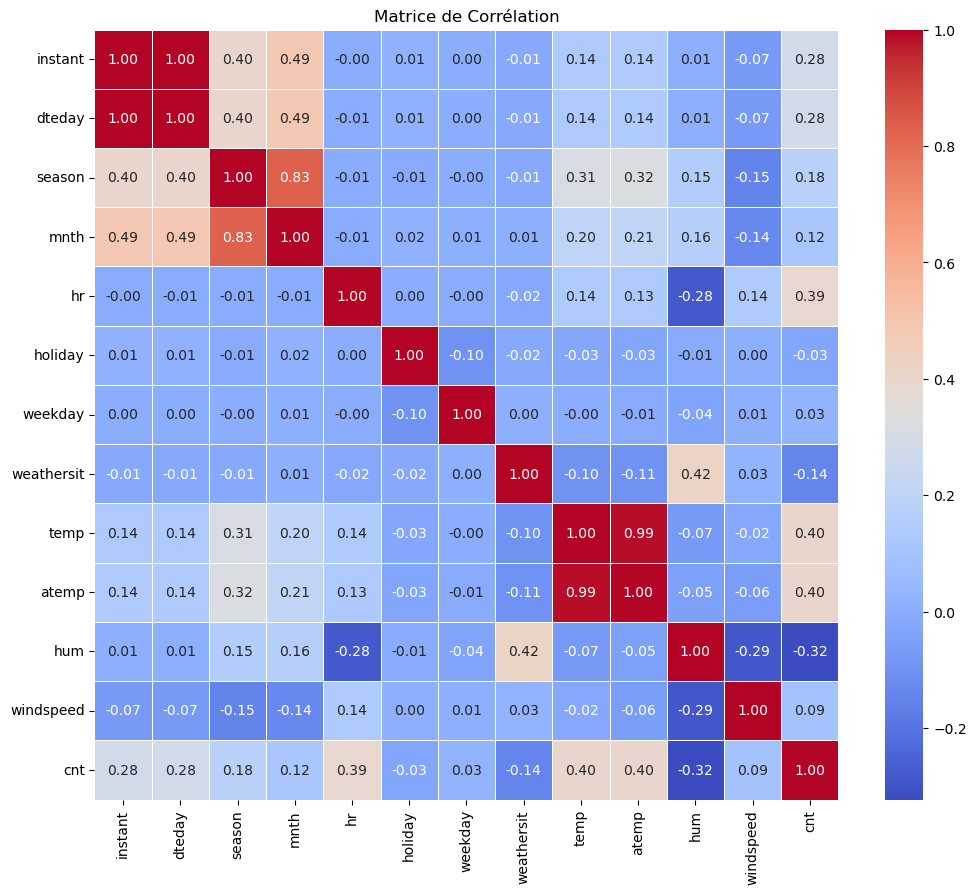

In [64]:
correlation_matrix = df_new.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

**Corrélations Fortes :**
Il existe une forte corrélation positive entre 'mnth' (mois) et 'season', ce qui est logique puisque les saisons sont définies par des mois.
La température ('temp') et la température ressentie ('atemp') sont également fortement corrélées, ce qui est attendu car elles mesurent des concepts similaires.
'hr' (heure du jour) a une corrélation modérée avec 'cnt' (nombre total de locations), indiquant que le moment de la journée a un impact significatif sur le nombre de vélos loués.

**Corrélations Faibles ou Négatives :**
L'humidité ('hum') a une faible corrélation négative avec 'cnt', suggérant que des niveaux d'humidité plus élevés pourraient légèrement décourager la location de vélos.
La vitesse du vent ('windspeed') a également une faible corrélation négative avec 'cnt', ce qui pourrait indiquer que le vent fort n'est pas favorable à la location de vélos.

**Pas de Corrélation ou Corrélation Négligeable :**
Les variables comme 'weekday', 'holiday', et 'workingday' ont des corrélations très faibles avec 'cnt', indiquant que ces facteurs n'ont pas un impact linéaire clair sur le nombre de vélos loués.
La variable 'weathersit' (type de temps) a également une faible corrélation avec 'cnt', ce qui peut être surprenant car on pourrait s'attendre à ce que le temps ait un impact plus significatif sur la location de vélo

**7) Proposez une visualisation pertinente à partir d'une approche non-supervisée**

Dans le contexte de l'apprentissage non-supervisé, une méthode courante pour visualiser les données est d'utiliser des techniques de réduction de dimensionnalité pour observer les regroupements naturels (ou clusters) au sein des données. L'une des techniques les plus populaires est l'Analyse en Composantes Principales (ACP ou PCA en anglais). Voici comment vous pourriez l'appliquer :


### Prétraitement : Standardisation des données (nécessaire pour PCA)

In [97]:
# Supposons que 'dteday' est la colonne avec des timestamps
df_numeric = df.select_dtypes(include=[np.number])
df_numeric

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2,9.02,13.635,80.0,0.0000,8,32,40
2,3,9.02,13.635,80.0,0.0000,5,27,32
3,4,9.84,14.395,75.0,0.0000,3,10,13
4,5,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
17374,17375,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,10.66,13.635,56.0,8.9981,13,48,61


on aura pas besoin des identifiant pour notre analyse. on peut donc les supprimer

In [98]:
df_numeric = df_numeric.drop(['instant'], axis=1)
df_numeric

,temp,atemp,hum,windspeed,casual,registered,cnt
0,9.84,14.395,81.0,0.0000,3,13,16
1,9.02,13.635,80.0,0.0000,8,32,40
2,9.02,13.635,80.0,0.0000,5,27,32
3,9.84,14.395,75.0,0.0000,3,10,13
4,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...
17374,10.66,12.880,60.0,11.0014,11,108,119
17375,10.66,12.880,60.0,11.0014,8,81,89
17376,10.66,12.880,60.0,11.0014,7,83,90
17377,10.66,13.635,56.0,8.9981,13,48,61


In [95]:
from sklearn.impute import SimpleImputer
# Imputation avec la moyenne pour les valeurs manquantes sur les données numériques
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_numeric)

### Application de PCA

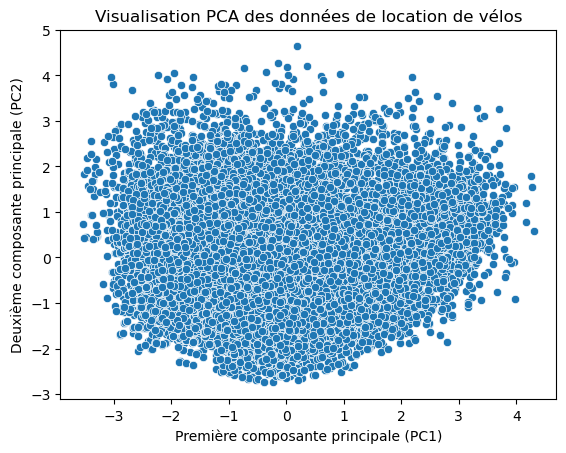

In [99]:
# Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Application de PCA
pca = PCA(n_components=2)  # Réduction à 2 composantes pour la visualisation
principal_components = pca.fit_transform(df_scaled)

# Création d'un DataFrame pour les résultats de PCA
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualisation
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Visualisation PCA des données de location de vélos')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.show()


## Feature Engineering

**8) Ajoutez à ce dataset une "feature" qui vous semble pertinente. Comment pouvez-vous évaluer l'apport potentiel de cette feature ? Montrez les graphiques ou tableaux pertinents pour appuyer votre réponse.**

In [68]:
from sklearn.impute import SimpleImputer
# Imputer les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [93]:
df['hr_point'] = df['hr'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)
df.head()

,instant,dteday,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,hr_point
0,1,2011-01-01,1,1,0,0,6,1,9.84,14.395,81.0,0.0000,16,0
1,2,2011-01-01,1,1,1,0,6,1,9.02,13.635,80.0,0.0000,40,0
2,3,2011-01-01,1,1,2,0,6,1,9.02,13.635,80.0,0.0000,32,0
3,4,2011-01-01,1,1,3,0,6,1,9.84,14.395,75.0,0.0000,13,0
4,5,2011-01-01,1,1,4,0,6,1,9.84,14.395,75.0,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,12,19,0,1,2,10.66,12.880,60.0,11.0014,119,1
17375,17376,2012-12-31,1,12,20,0,1,2,10.66,12.880,60.0,11.0014,89,0
17376,17377,2012-12-31,1,12,21,0,1,1,10.66,12.880,60.0,11.0014,90,0
17377,17378,2012-12-31,1,12,22,0,1,1,10.66,13.635,56.0,8.9981,61,0


In [111]:
df['dteday'] = pd.to_datetime(df['dteday'])
df["month"] = df['dteday'].dt.month
df["day"] = df['dteday'].dt.day
df

,instant,dteday,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,day
0,1,2011-01-01,1,1,0,0,6,1,9.84,14.395,81.0,0.0000,3,13,16,1,1
1,2,2011-01-01,1,1,1,0,6,1,9.02,13.635,80.0,0.0000,8,32,40,1,1
2,3,2011-01-01,1,1,2,0,6,1,9.02,13.635,80.0,0.0000,5,27,32,1,1
3,4,2011-01-01,1,1,3,0,6,1,9.84,14.395,75.0,0.0000,3,10,13,1,1
4,5,2011-01-01,1,1,4,0,6,1,9.84,14.395,75.0,0.0000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,12,19,0,1,2,10.66,12.880,60.0,11.0014,11,108,119,12,31
17375,17376,2012-12-31,1,12,20,0,1,2,10.66,12.880,60.0,11.0014,8,81,89,12,31
17376,17377,2012-12-31,1,12,21,0,1,1,10.66,12.880,60.0,11.0014,7,83,90,12,31
17377,17378,2012-12-31,1,12,22,0,1,1,10.66,13.635,56.0,8.9981,13,48,61,12,31


In [112]:
features = df.drop(["dteday","casual","registered","cnt"], axis =1)
features

,instant,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,month,day
0,1,1,1,0,0,6,1,9.84,14.395,81.0,0.0000,1,1
1,2,1,1,1,0,6,1,9.02,13.635,80.0,0.0000,1,1
2,3,1,1,2,0,6,1,9.02,13.635,80.0,0.0000,1,1
3,4,1,1,3,0,6,1,9.84,14.395,75.0,0.0000,1,1
4,5,1,1,4,0,6,1,9.84,14.395,75.0,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,12,19,0,1,2,10.66,12.880,60.0,11.0014,12,31
17375,17376,1,12,20,0,1,2,10.66,12.880,60.0,11.0014,12,31
17376,17377,1,12,21,0,1,1,10.66,12.880,60.0,11.0014,12,31
17377,17378,1,12,22,0,1,1,10.66,13.635,56.0,8.9981,12,31


In [114]:
target = df["cnt"]
target

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

Dans cette partie, vous allez entraîner un modèle prédictif pour prédire le nombre total de locations de vélos. **Utilisez la librairie sklearn** et lisez attentivement la documentation des fonctions que vous serez amenés à choisir. De manière générale, **commencez simple** et vous pourrez améliorer votre modèle dans la partie suivante, ou donner vos pistes de réflexion à la fin de ce TP.

**9) Séparez au sein du dataset vos jeux d'entraînement et de test. A quoi cette étape sert-elle ?**

In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [116]:
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**10) Choisissez un modèle et indiquez les raisons de ce choix. Si des pré-traitements spécifiques sont nécessaires à la bonne exécution et performance de l'algorithme, vous les effectuerez ici en indiquant pourquoi ils sont nécessaires. Vous pourrez ensuite procéder à l'entraînement de votre modèle à l'aide de la fonction *fit* présente sur l'ensemble des estimateurs sklearn**

In [ ]:
# Créer et entraîner le modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train_scaled, y_train)

**11) Ce premier modèle est-il performant ? Comment mesurez-vous sa performance et pourquoi ?**

## Améliorer le modèle

**12) Quelles données supplémentaires permettraient d’avoir une prédiction plus précise ? De quelles données aurait-on besoin pour assurer la maintenance complète des bornes de location ?**

**13) Mettez en place les techniques de régularisation adaptées à l’algorithme choisi**

**14) Mettez en place le choix des meilleurs hyperparamètres**

**15) Quelle(s) autre(s) approche(s) aurait pu être pertinente(s) ? Vous pourrez indiquer ici les pistes d'améliorations que vous envsageriez si vous étiez amené à poursuivre ce projet**